In [ ]:
# Лабораторная работа 2. Вариант 6

### Задание 1
**Написать программу, которая строит LU-разложение матрицы A и решает слау Ax=b. Кроме вектора
x программа должна выводить матрицы L и U (возможно совмещённые в одну), а также вектор перестановок.**

In [10]:
import scipy.linalg
import time
import numpy
import matplotlib
import matplotlib.pyplot as plt

In [8]:
def mult_matrix(M, N):
    return numpy.matmul(M, N)


def pivot_matrix(M):
    """Returns the pivoting matrix for M, used in Doolittle's method."""
    m = len(M)
    # Create an identity matrix, with floating point values
    id_mat = [[float(i == j) for i in range(m)] for j in range(m)]

    # Rearrange the identity matrix such that the largest element of
    # each column of M is placed on the diagonal of of M

    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(M[j][i]))
        if j != row:
            # swap the rows
            id_mat[j], id_mat[row] = id_mat[row], id_mat[j]
    return id_mat


def lu_decomposition(A):
    """Performs an LU Decomposition of A (which must be square)
    into PA = LU. The function returns P, L and U."""

    n = len(A)
    # Create zero matrices for L and U
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]

    # Create the pivot matrix P and the multipled matrix PA
    P = pivot_matrix(A)
    PA = mult_matrix(P, A)

    # Perform the LU Decomposition
    for j in range(n):
        # All diagonal entries of L are set to unity
        L[j][j] = 1.0
        # LaTeX: u_{ij} = a_{ij} - \sum_{k=1}^{i-1} u_{kj} l_{ik}
        for i in range(j + 1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = PA[i][j] - s1

        # LaTeX: l_{ij} = \frac{1}{u_{jj}} (a_{ij} - \sum_{k=1}^{j-1} u_{kj}
        for i in range(j, n):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
            L[i][j] = (PA[i][j] - s2) / U[j][j]

    return P, L, U


def solve_lu(P, L, U, b):
    n = len(L)
    bb = numpy.matmul(P, b)

    y = numpy.zeros(n)
    for i in range(n):
        y[i] = bb[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
        y[i] = y[i] / L[i][i]
    y = numpy.asmatrix(y).T

    # Ux = b
    x = numpy.zeros(n)
    Uy = numpy.asarray(numpy.c_[U, numpy.asarray(y)], dtype=numpy.float64)
    x[n - 1] = float(Uy[n - 1][n]) / Uy[n - 1][
        n - 1]  # simply solve the last row, since there should be only one unknown
    for i in range(n - 1, -1, -1):  # start,stop, step - starting from the second last row work back up the rows
        z = 0.0  # let z=0 or reset to 0
        for j in range(i + 1, n):  # for each column in a Row j
            z = z + float(Uy[i][j]) * x[
                j]  # substitute answers from below(stored in x) into the equation of the current row
        x[i] = float(Uy[i][n] - z) / Uy[i][i]  # solve for this row, where there should now be only one unknown

    return x

### Задание 2
**Найти точное решение указанных систем с использованием библиотеки SymPy или аналогичного программного обеспечения и сравнить результаты**

**Второе СЛАУ мы решить не можем, так как определитель матрицы равен нулю.**

In [11]:
import copy
import time

Matrixs = {1: ([[4, 1, 0],  # First SoLE
                [4, 1, -4],
                [-1, 0, 2]],
               [6, -6, 5]),  # vector b

           2: ([[-3, -1, -5, 5],
                [-3, -1, 3, -1],
                [-6, -2, -2, 4],
                [1, 2, -5, 3]],
               [8, -4, 4, 10]),

           3: ([[1, 1, 1, 1, 1, 1, 1, 1],
                [1, 2, 4, 8, 16, 32, 64, 128],
                [1, 3, 9, 27, 81, 243, 729, 2187],
                [1, 4, 16, 64, 256, 1024, 4096, 16384],
                [1, 5, 25, 125, 625, 3125, 15625, 78125],
                [1, 6, 36, 216, 1296, 7776, 46656, 279936],
                [1, 7, 49, 343, 2401, 16807, 117649, 823543],
                [1, 8, 64, 512, 4096, 32768, 262144, 2097152]],
               [28, 1538, 21324, 145636, 659180, 2284278, 6565468, 16434824])
           }

LU_build_time = []
LU_solve_time = []  

def print_results(key, value):
    SoLE = copy.copy(value[0])
    b_vector = copy.copy(value[1])

    t3_lup = time.time()
    P, L, U = lu_decomposition(SoLE)
    LU_build_time.append(time.time() - t3_lup)

    print(f"SoLE №{key}:")
    print("Matrix L: \n", numpy.asarray(L).view())
    print("Matrix U: \n", numpy.asarray(U).view())
    print("Matrix P: \n", numpy.asarray(P).view())

    t4_lup = time.time()
    x = solve_lu(P, L, U, b_vector)
    LU_solve_time.append(time.time() - t4_lup)

    print(f"Solved (my implementation): {x}")

    LU = scipy.linalg.lu_factor(value[0])

    result = scipy.linalg.lu_solve(LU, value[1])
    print(f"Solved (SciPy): {result}")
    print("----------------------------------------------")
    print()


for k, v in Matrixs.items():
    print_results(k, v)
        
i = 0
for build_time, solve_time in zip(reversed(LU_build_time), reversed(LU_solve_time)):
    i += 1
    print(f"For SoLE №{i} time of building = {build_time}, time of solving = {solve_time}")
    

SoLE №1:
Matrix L: 
 [[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 1.    0.    1.  ]]
Matrix U: 
 [[ 4.    1.    0.  ]
 [ 0.    0.25  2.  ]
 [ 0.    0.   -4.  ]]
Matrix P: 
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Solved (my implementation): [1. 2. 3.]
Solved (SciPy): [1. 2. 3.]
----------------------------------------------

SoLE №2:
Matrix L: 
 [[ 1.          0.          0.          0.        ]
 [ 0.5                nan  0.          0.        ]
 [-0.16666667         inf         nan  0.        ]
 [ 0.5                nan         nan         nan]]
Matrix U: 
 [[ -6.  -2.  -2.   4.]
 [  0.   0.  -4.   3.]
 [  0.   0.  inf -inf]
 [  0.   0.   0.  nan]]
Matrix P: 
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
Solved (my implementation): [nan nan nan nan]
Solved (SciPy): [nan nan nan nan]
----------------------------------------------

SoLE №3:
Matrix L: 
 [[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         1.         0.         0. 

c:\users\deltaminer\pycharmprojects\mv_lab_2\venv\include\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
c:\users\deltaminer\pycharmprojects\mv_lab_2\venv\include\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\deltaminer\pycharmprojects\mv_lab_2\venv\include\lib\site-packages\ipykernel_launcher.py:48: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.



### Задание 3.1
**Вычислить число обусловленности в максимум-норме матрицы А из третьего тестового задания. Что это означает на практике?**


На практике это означает, что нам нужно вычислить максимум-норму сначала матрицы A, затем
максимум-норму матрицы A$^{-1}$. И затем нужно перемножить данные нормы ||A||*||A$^{-1}$||. В итоге
мы получим число обусловленности матрицы A. 

Число обусловленности задачи показывает, во сколько раз относительная 
погрешность возмущенного решения может превосходить относительную
погрешность соответствующих начальных данных.

In [13]:
def max_norm_matrix(matirx):
    sums = []

    for row in matirx:
        sum = 0
        for elem in row:
            sum += abs(elem)
        sums.append(sum)

    return max(sums)


def matrix_condition_number(matrix):
    try:
        result = max_norm_matrix(scipy.linalg.inv(matrix)) * max_norm_matrix(matrix)  # ||A||*||A^(-1)||
    except numpy.linalg.LinAlgError as err:
        print("Impossible to count, because: ", err)
        return float('inf')
    else:
        return result

for k, v in Matrixs.items():
    print(f"Condition number of matrix (My implementation) №{k} = {matrix_condition_number(v[0])}")
    print(f"Condition number of matrix (NumPy) №{k} = {numpy.linalg.cond(v[0], p=float('inf'))}")

Condition number of matrix (My implementation) №1 = 63.0
Condition number of matrix (NumPy) №1 = 63.0
Impossible to count, because:  singular matrix
Condition number of matrix (My implementation) №2 = inf
Condition number of matrix (NumPy) №2 = inf
Condition number of matrix (My implementation) №3 = 1480594930.2851856
Condition number of matrix (NumPy) №3 = 1480594930.2851877


### Задание 3.2
**Путём решения нескольких СЛАУ с возмущённым вектором b подтвердите связь между числом обусловленности
и относительными погрешностями начальных данных и решения.**


Для того, чтобы увидеть, что число обусловленности зависит от относительной погрешности
начальных данных и решения, можно проверить, выполняется ли следующее неравенство:

$\delta_x$ $\leq$ $\kappa(A)$$\cdot$$\delta_b$ , где $\delta_x$ , $\delta_b$ - 
относительные погрешности начальных данных и решения соответственно, а $\kappa(A)$ - 
число обусловленности матрицы A.

In [23]:
def generate_new_b(b, delta):
    new_b = [elem + delta for elem in b]
    return new_b

def check_inequality(matrix, b, new_b, condition_number):
    P, L, U = lu_decomposition(matrix)
    x1 = numpy.asarray(solve_lu(P, L, U, b))    
    x2 = numpy.asarray(solve_lu(P, L, U, new_b))
    
    dx = [x2[i] - x1[i] for i in range(len(x1))]
    db = [new_b[i] - b[i] for i in range(len(b))]
    
    delta_x = numpy.linalg.norm(dx, ord=float('inf')) / numpy.linalg.norm([x1], ord=float('inf'))
    delta_y = numpy.linalg.norm(db, ord=float('inf')) / numpy.linalg.norm([b], ord=float('inf'))
    
    inequalite = delta_x <= condition_number * delta_y
    return inequalite

matrix = copy.copy(Matrixs[3][0])
b = [28, 1538, 21324, 145636, 659180, 2284278, 6565468, 16434824]

condition_number = numpy.linalg.cond(matrix, p=float('inf'))

new_b_vectors = [generate_new_b(b, 1), generate_new_b(b, 2), generate_new_b(b, 10)]

for _b in new_b_vectors:
    if check_inequality(matrix, b, _b, condition_number):
        print("Test passed successfully")
    
    

Test passed successfully
Test passed successfully
Test passed successfully


### Задание 4
**Проведите экспериментальное исследование скорости решения СЛАУ в зависимости от размерности системы, используя для тестов матрицу и вектор со случаными числами. 
Постройте график зависимости времени работы от размерности. Систему какой размерности ваша программа на вашем компьютере
может решить за одну минуту.**

Calculating...
Calculating...
Calculating...
Calculating...
Calculating...
Calculating...
Calculating...
Calculating...
Times:  [0.003986358642578125, 0.07082295417785645, 0.45876026153564453, 2.0243468284606934, 3.649315357208252, 16.06108784675598, 25.921916484832764, 59.159281492233276]
Finish


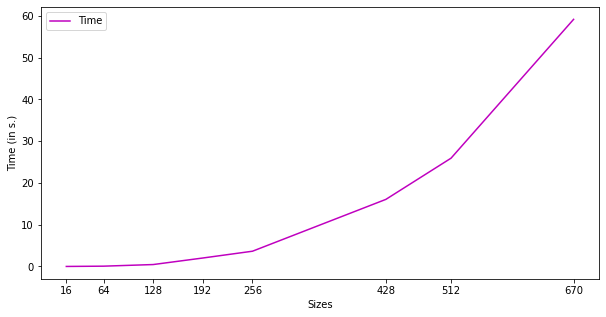

In [15]:
SIZES = [16, 64, 128, 192, 256, 428, 512, 670]

def draw_results(times, sizes):
    matplotlib.rc('ytick', labelsize=10)
    matplotlib.rc('xtick', labelsize=10)
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times, label='Time', color="m")
    # plt.xscale('log')
    plt.xticks(sizes, sizes)
    plt.xlabel('Sizes', fontsize=10)
    plt.ylabel('Time (in s.)', fontsize=10)
    plt.legend()
    plt.show()
    
def test_time(sizes, numbers):
    for size_of_matrix in sizes:
        print("Calculating...")
        random_matrix = numpy.random.randint(numbers[0], numbers[1], size=(size_of_matrix, size_of_matrix))
        random_vector_b = numpy.random.randint(numbers[0], numbers[1], size=(size_of_matrix, 1))

        lup_solve_begin = time.time()
        P, L, U = lu_decomposition(random_matrix)
        x = solve_lu(P, L, U, random_vector_b)
        lup_solve_end = time.time() - lup_solve_begin

        yield lup_solve_end

speed_total_solve = [_time for _time in test_time(SIZES, (1, 10))]
print("Times: ", speed_total_solve)
draw_results(speed_total_solve, SIZES)
print("Finish")
    

Как мы можем заметить из этого графика, система размерности 670x670 решается примерно за минуту.

### Вывод 
**В ходе выполненной работы реализовал решение СЛАУ с помощью метода LU-разложения, вычисление числа обусловленности матриц.
Также убедился в том, что существует связь между числом обусловленности и относительной погрешностью.**
